In [20]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np

pybamm.set_logging_level('NOTICE')

In [21]:
model = pybamm.lithium_ion.SPMe()

2022-05-11 17:21:40,687 - [NOTICE] simulation.solve(755): Cycle 1/1 (26.678 ms elapsed) --------------------
2022-05-11 17:21:40,688 - [NOTICE] simulation.solve(789): Cycle 1/1, step 1/1: Discharge at 0.0500C until 3.2V
2022-05-11 17:21:41,184 - [NOTICE] simulation.solve(911): Finish experiment simulation, took 523.676 ms
2022-05-11 17:21:41,683 - [NOTICE] simulation.solve(755): Cycle 1/1 (29.613 ms elapsed) --------------------
2022-05-11 17:21:41,684 - [NOTICE] simulation.solve(789): Cycle 1/1, step 1/1: Discharge at 0.3105C until 3.2V
2022-05-11 17:21:42,005 - [NOTICE] simulation.solve(911): Finish experiment simulation, took 351.374 ms
2022-05-11 17:21:42,442 - [NOTICE] simulation.solve(755): Cycle 1/1 (26.826 ms elapsed) --------------------
2022-05-11 17:21:42,443 - [NOTICE] simulation.solve(789): Cycle 1/1, step 1/1: Discharge at 0.5711C until 3.2V
2022-05-11 17:21:42,673 - [NOTICE] simulation.solve(911): Finish experiment simulation, took 257.516 ms
2022-05-11 17:21:43,117 - [N

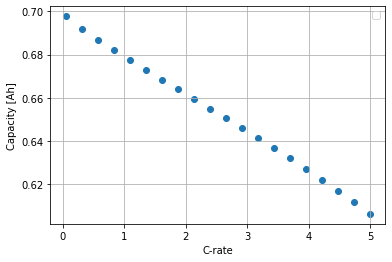

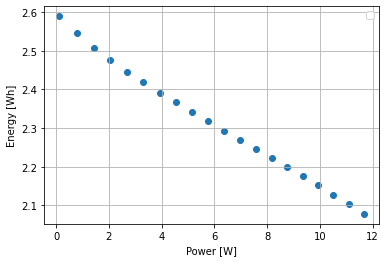

In [23]:
C_rates = np.linspace(0.05, 5, 20)
capacities = np.zeros_like(C_rates)
currents = np.zeros_like(C_rates)
voltage_av = np.zeros_like(C_rates)

for i, C_rate in enumerate(C_rates):
    experiment = pybamm.Experiment(
        ["Discharge at {:.4f}C until 3.2V".format(C_rate)],
        period="{:.4f} seconds".format(10 / C_rate)
    )
    sim = pybamm.Simulation(
        model,
        experiment=experiment,
        solver=pybamm.CasadiSolver(dt_max=120)
    )
    sim.solve()

    time = sim.solution["Time [s]"].entries
    capacity = sim.solution["Discharge capacity [A.h]"]
    current = sim.solution["Current [A]"]
    voltage = sim.solution["Terminal voltage [V]"]

    capacities[i] = capacity(time[-1])
    currents[i] = current(time[-1])
    voltage_av[i] = np.mean(voltage(time))

2022-05-11 17:33:53,095 - [WARNING] legend._parse_legend_args(1217): No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2022-05-11 17:33:53,234 - [WARNING] legend._parse_legend_args(1217): No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


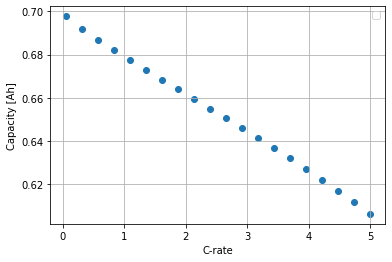

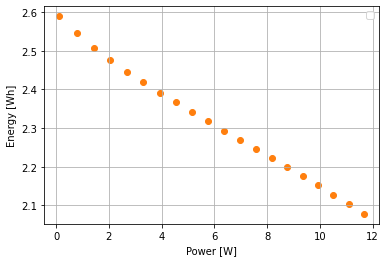

In [33]:
plt.figure(1)
plt.scatter(C_rates, capacities, color='tab:blue')
plt.xlabel('C-rate')
plt.ylabel('Capacity [Ah]')
plt.legend()
plt.grid()
plt.savefig('rate_capability_plot.png', bbox_inches='tight', dpi=150)

plt.figure(2)
plt.scatter(currents * voltage_av, capacities * voltage_av, color='tab:orange')
plt.xlabel('Power [W]')
plt.ylabel('Energy [Wh]')
plt.legend()
plt.grid()
plt.savefig('ragon_plot.png', bbox_inches='tight', dpi=150)

plt.show()